In [1]:
import numpy as np
from scipy.stats import binned_statistic
import dictionaries
import pandas
import matplotlib.pyplot as plt
% matplotlib notebook

plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18

data = pandas.read_csv('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/nsa_debiased_frist_question_only.csv')

<IPython.core.display.Javascript object>


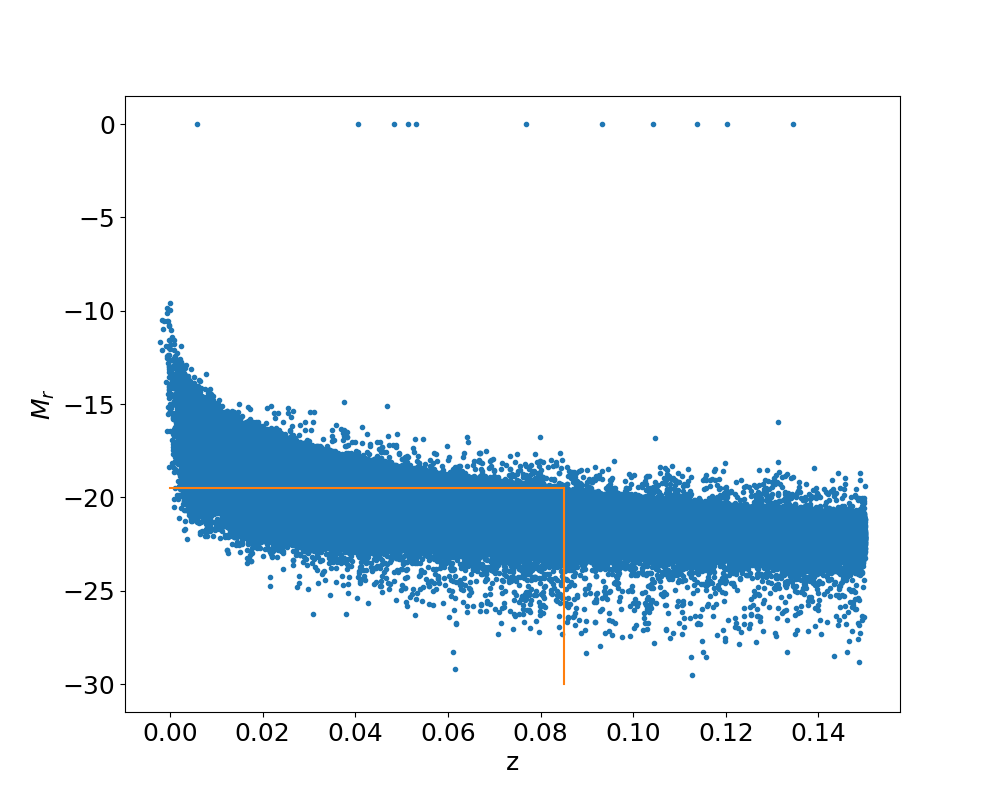

142222


In [2]:
data.columns
plt.figure(0)
plt.plot(data.z, data.r_mag, '.')
plt.plot([0, 0.085], [-19.5, -19.5], color='C1')
plt.plot([0.085, 0.085], [-19.5, -30], color='C1')
plt.xlabel('z')
plt.ylabel(r'$M_r$')
# plt.savefig('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/volume_limit.png')

volume_limit = (data.z < 0.085) & (data.r_mag < -19.5)
print(volume_limit.sum())

<IPython.core.display.Javascript object>


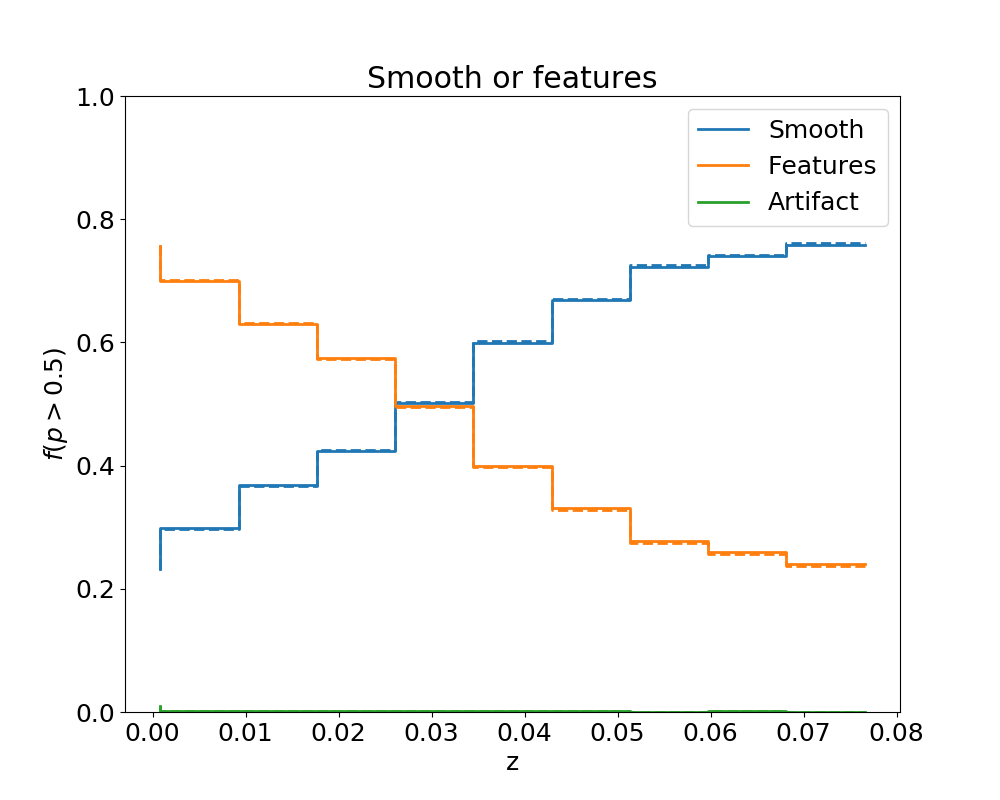

In [3]:
import copy
figure_number = 1

for question, values in dictionaries.questions.items():
    fig = plt.figure(figure_number)
    p_q = 1
    if values['pre_questions'] is not None:
        for q_, a_ in zip(values['pre_questions'], values['pre_answers']):
            p_q *= data['{}_{}_weight_fraction'.format(q_,a_)]
    N_q = data[[name for name in data.columns if (question in name) and ('_weight' in name)]].sum(axis=1)
    sample_ok = (p_q > 0.5) & (N_q >= 5) & volume_limit
    b_orig_storage = []
    x_orig_storage = []
    b_deb_storage = []
    x_deb_storage = []
    for a_key, a_label in zip(values['answers'], values['answerlabels']):
        fraction_column = '{0}_{1}_weight_fraction'.format(question, a_key)
        debias_column = '{0}_{1}_debiased'.format(question, a_key)
        x_orig, b_orig, _ = binned_statistic(data.z[sample_ok], data[fraction_column][sample_ok] > 0.5, bins=10, statistic='sum')
        x_deb, b_deb, _ = binned_statistic(data.z[sample_ok], data[debias_column][sample_ok] > 0.5, bins=10, statistic='sum')
        x_orig_storage.append(copy.deepcopy(x_orig))
        b_orig_storage.append(copy.deepcopy(b_orig))
        x_deb_storage.append(copy.deepcopy(x_deb))
        b_deb_storage.append(copy.deepcopy(b_deb))
    x_orig_total = np.array(x_orig_storage).sum(axis=0)
    x_deb_total = np.array(x_deb_storage).sum(axis=0)
    color_counter = 0
    for adx, a_label in enumerate(values['answerlabels']):
        b_orig = b_orig_storage[adx]
        x_orig = x_orig_storage[adx] / x_orig_total
        plt.plot(b_orig[:-1], x_orig, color='C{0}'.format(color_counter), drawstyle='steps', ls='-', lw=2, label=a_label)
        b_deb = b_deb_storage[adx]
        x_deb = x_deb_storage[adx] / x_deb_total
        plt.plot(b_deb[:-1], x_deb, color='C{0}'.format(color_counter), drawstyle='steps', ls='--', lw=2)
        color_counter += 1
    plt.legend()
    plt.ylim(0, 1)
    plt.xlabel('z')
    plt.ylabel(r'$f(p>0.5)$')
    plt.title(values['questionlabel'])
    # plt.savefig('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/{0}_debiased_volume_limit.png'.format(question))
    figure_number += 1
    break

<IPython.core.display.Javascript object>


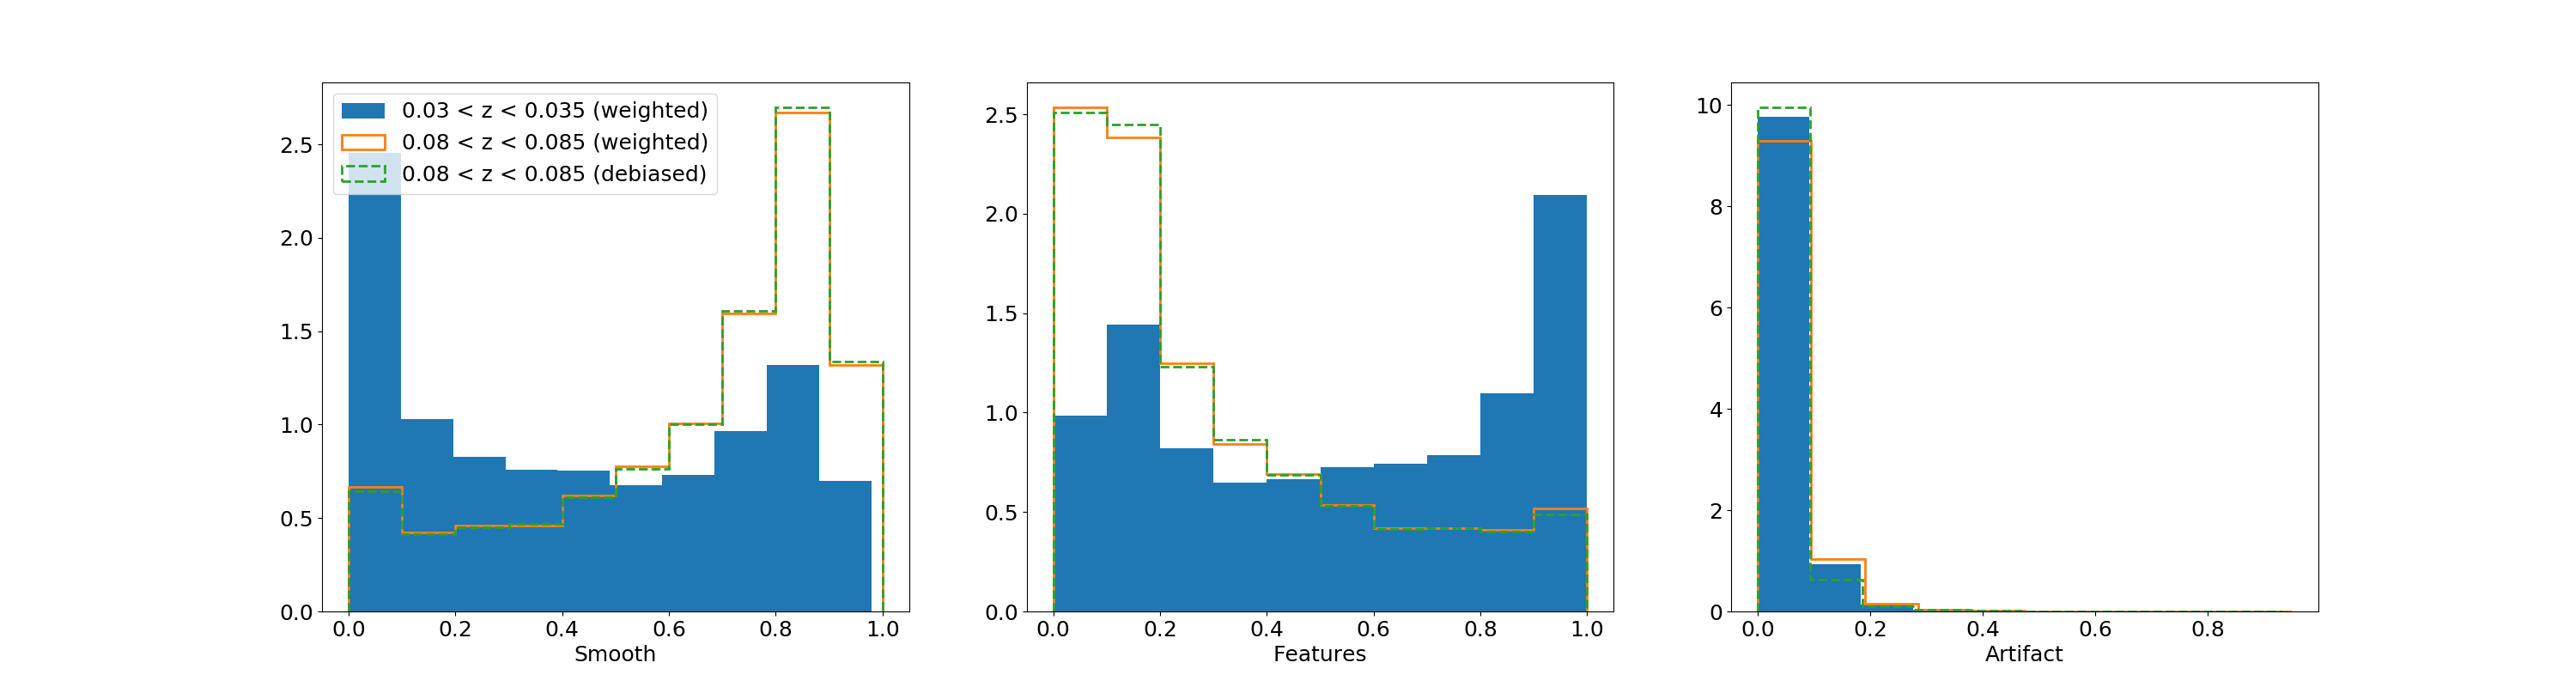

In [4]:
low_z = (data.z > 0.03) & (data.z <= 0.035) & (data.t01_smooth_or_features_a01_smooth_debiased <= 1) & volume_limit
high_z = (data.z > 0.08) & (data.z <= 0.085) & (data.t01_smooth_or_features_a01_smooth_debiased <= 1) & volume_limit
plt.figure(11, figsize=(30, 8))
plt.subplot(131)
plt.hist(data.t01_smooth_or_features_a01_smooth_weight_fraction[low_z], bins=10, histtype='stepfilled', label='0.03 < z < 0.035 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a01_smooth_weight_fraction[high_z], bins=10, histtype='step', lw=2, label='0.08 < z < 0.085 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a01_smooth_debiased[high_z], bins=10, histtype='step', ls='--', lw=2, label='0.08 < z < 0.085 (debiased)', normed=True)
plt.legend(loc=2)
plt.xlabel('Smooth')

low_z = (data.z > 0.03) & (data.z <= 0.035) & (data.t01_smooth_or_features_a02_features_or_disk_debiased <= 1) & volume_limit
high_z = (data.z > 0.08) & (data.z <= 0.085) & (data.t01_smooth_or_features_a02_features_or_disk_debiased <= 1) & volume_limit
plt.subplot(132)
plt.hist(data.t01_smooth_or_features_a02_features_or_disk_weight_fraction[low_z], bins=10, histtype='stepfilled', label='0.03 < z < 0.035 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a02_features_or_disk_weight_fraction[high_z], bins=10, histtype='step', lw=2, label='0.08 < z < 0.085 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a02_features_or_disk_debiased[high_z], bins=10, histtype='step', ls='--', lw=2, label='0.08 < z < 0.085 (debiased)', normed=True)
plt.xlabel('Features')

low_z = (data.z > 0.03) & (data.z <= 0.035) & (data.t01_smooth_or_features_a03_star_or_artifact_debiased <= 1) & volume_limit
high_z = (data.z > 0.08) & (data.z <= 0.085) & (data.t01_smooth_or_features_a03_star_or_artifact_debiased <= 1) & volume_limit
plt.subplot(133)
plt.hist(data.t01_smooth_or_features_a03_star_or_artifact_weight_fraction[low_z], bins=10, histtype='stepfilled', label='0.03 < z < 0.035 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a03_star_or_artifact_weight_fraction[high_z], bins=10, histtype='step', lw=2, label='0.08 < z < 0.085 (weighted)', normed=True)
plt.hist(data.t01_smooth_or_features_a03_star_or_artifact_debiased[high_z], bins=10, histtype='step', ls='--', lw=2, label='0.08 < z < 0.085 (debiased)', normed=True)
plt.xlabel('Artifact')

plt.savefig('/Volumes/SD_Extra/galaxy_zoo_nsa_matching/debias/T01_z_hist_volume_limit.png')